Data Loading

In [31]:
import pandas as pd

# Load the dataset
file_path = 'D:/AI large project 1/archive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it's loaded correctly
print(data.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

Data Preprocessing and Splitting

In [32]:
from sklearn.model_selection import train_test_split

# Assuming 'Diabetes_binary' is the target variable
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define ML Models and Setup Pipelines

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Define simplified models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=100, solver='liblinear'),  
    "SVC": SVC(kernel='linear', C=1),  
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5),  
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1)  
}

# Define a pipeline for each model
pipelines = {name: Pipeline([('scaler', StandardScaler()), ('model', model)]) for name, model in models.items()}

# Model evaluation using cross-validation 
results = {}
for name, pipeline in pipelines.items():
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1)  
    results[name] = cv_scores
    print(f"{name} Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")


Logistic Regression Accuracy: 0.7473 (+/- 0.0056)
SVC Accuracy: 0.7480 (+/- 0.0058)
Random Forest Accuracy: 0.7423 (+/- 0.0076)
Gradient Boosting Accuracy: 0.7506 (+/- 0.0066)


SMOTE and Pipeline Creation

In [34]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model (using Logistic Regression as an example)
model = LogisticRegression(max_iter=100, solver='liblinear')

# Create an imbalanced-learn pipeline with SMOTE and the classifier
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', model)
])

# Fit this pipeline to training data
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Hyperparameter Tuning for Machine Learning Models

1.1 Hyperparameter Tuning with GridSearchCV for Random Forest

In [35]:
#Parameter grid for Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 150],  
    'model__max_depth': [None, 10]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(pipelines['Random Forest'], param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(f"Classification Report for Random Forest:\n{classification_report(y_test, y_pred_rf)}")

Best parameters for Random Forest: {'model__max_depth': 10, 'model__n_estimators': 100}
Best score for Random Forest: 0.750517213940905
Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



1.2 Hyperparameter Tuning with GridSearchCV for Logistic Regression

In [36]:
#Parameter grid for Logistic Regression
param_grid_lr = {
    'model__C': np.logspace(-3, 3, 4),  
    'model__solver': ['liblinear']  
}

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(pipelines['Logistic Regression'], param_grid=param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)

# Evaluate the best model on the test set
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
print(f"Classification Report for Logistic Regression:\n{classification_report(y_test, y_pred_lr)}")

Best parameters for Logistic Regression: {'model__C': 0.1, 'model__solver': 'liblinear'}
Best score for Logistic Regression: 0.7473520414478454
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



1.3 Hyperparameter Tuning with GridSearchCV for Gradient Boosting

In [37]:
# Define a pipeline with preprocessing and the model
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42)) 
])

# Define a parameter grid to search over
param_grid_gb = {
    'model__n_estimators': [100, 150],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

# Initialize and perform the grid search
grid_search_gb = GridSearchCV(pipeline_gb, param_grid=param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Output the best parameters and score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)

# Directly evaluate the best model from grid search on the test set
y_pred_gb = grid_search_gb.predict(X_test)
print(f"Classification Report for Gradient Boosting:\n{classification_report(y_test, y_pred_gb)}")

Best parameters for Gradient Boosting: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 150}
Best score for Gradient Boosting: 0.7532049581808216
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.75     14139
weighted avg       0.76      0.76      0.75     14139



Hyperparameter Tuning with RandomizedSearchCV for SVC

In [38]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_svc = {
    'model__C': [1],  
    'model__kernel': ['rbf'],  
    'model__gamma': ['scale']  
}

# Initialize RandomizedSearchCV for SVC with optimized settings
random_search_svc = RandomizedSearchCV(
    pipelines['SVC'],
    param_distributions=param_grid_svc,
    n_iter=2, 
    cv=2, 
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_svc.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for SVC:", random_search_svc.best_params_)
print("Best score for SVC:", random_search_svc.best_score_)

# Evaluate the best model on the test set
best_svc = random_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
print(f"Classification Report for SVC:\n{classification_report(y_test, y_pred_svc)}")

c:\Users\ravad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=2. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVC: {'model__kernel': 'rbf', 'model__gamma': 'scale', 'model__C': 1}
Best score for SVC: 0.7494386078014774
Classification Report for SVC:
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      7090
         1.0       0.72      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Evaluating the Voting Classifier on the Diabetes Dataset

In [46]:
# Create and fit the voting classifier with the actual diabetes dataset models
voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('rf', best_rf),
    ('gb', best_gb),
    ('svc', best_svc)
], voting='hard')
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier on the test set
y_pred_voting = voting_clf.predict(X_test)
print(f"Classification Report for Voting Classifier on the Diabetes Dataset:\n{classification_report(y_test, y_pred_voting)}")

Classification Report for Voting Classifier on the Diabetes Dataset:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        93
           1       0.94      0.82      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



Visualization of Model Performance with Confusion Matrix

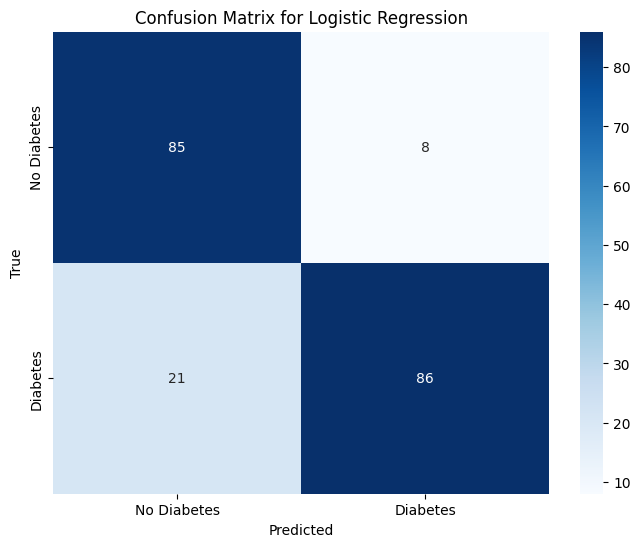

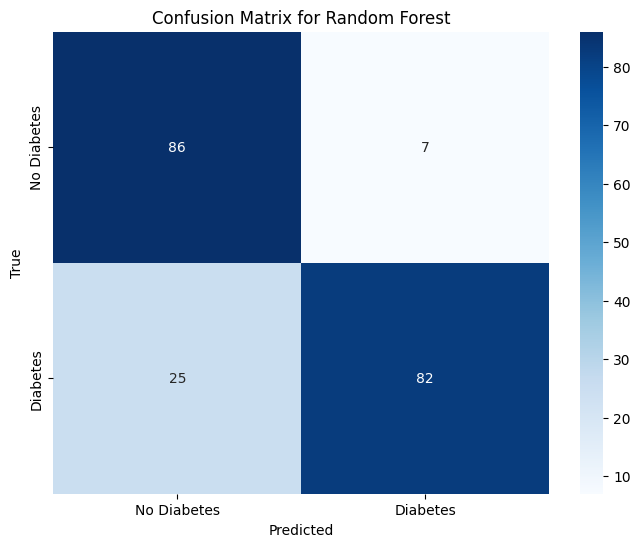

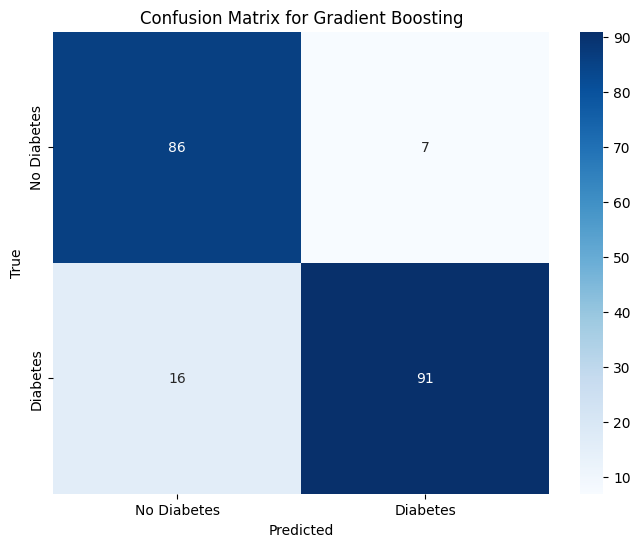

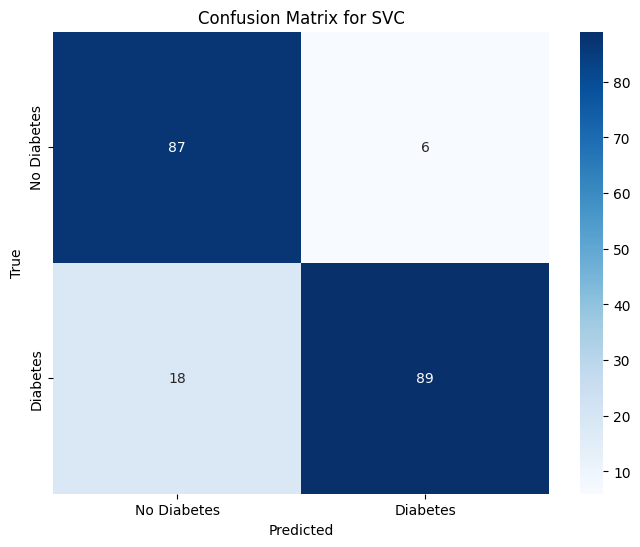

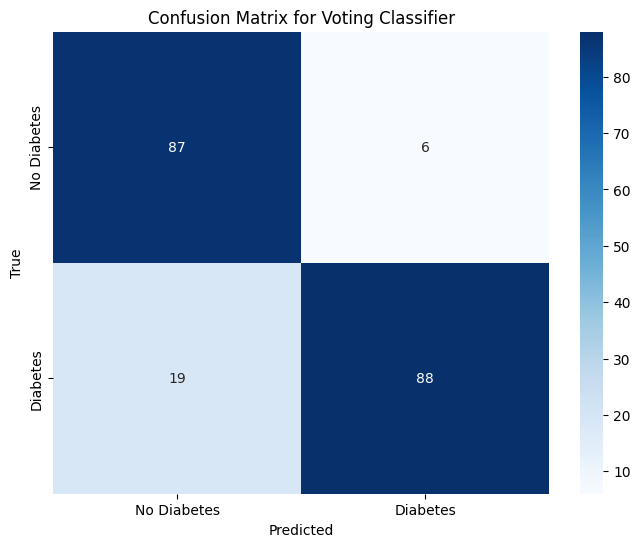

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, title='Confusion Matrix for Logistic Regression')
plot_confusion_matrix(y_test, y_pred_rf, title='Confusion Matrix for Random Forest')
plot_confusion_matrix(y_test, y_pred_gb, title='Confusion Matrix for Gradient Boosting')
plot_confusion_matrix(y_test, y_pred_svc, title='Confusion Matrix for SVC')
plot_confusion_matrix(y_test, y_pred_voting, title='Confusion Matrix for Voting Classifier')
